0.99581329914


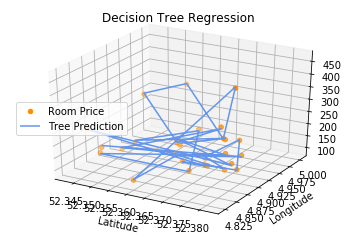

In [17]:
#Data Cleaning Imports
import pandas as pd
import numpy as np

#Scikit Imports
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import explained_variance_score

#Visualization Imports
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('amsterdam_airbnb.csv')
data = data[['latitude', 'longitude', 'price']]
y = data.price

#Begin live demo here

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.005, train_size=0.25)

clf = DecisionTreeRegressor(max_depth=5)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

#End live demo

#Best possible score is 1.0
print(explained_variance_score(y_test, y_predict))

#Output DOT file for graphviz representation
tree.export_graphviz(clf, out_file='tree.dot')
#Plot Results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test.latitude, X_test.longitude, y_test, color='darkorange', label='Room Price')
ax.plot_wireframe(X_test.latitude, X_test.longitude, y_predict, color='cornflowerblue', label='Tree Prediction')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Decision Tree Regression")
plt.legend(loc=6)
plt.show()
